<a href="https://colab.research.google.com/github/PreranaKolambkar/Unified-Mentor-Internship/blob/main/Coffee_Sales_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [ ]:
#Load the Dataset
df=pd.read_csv('/content/index.csv')

In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


**1. Data Set Detailing**

In [ ]:
#First five rows of the dataset
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
#Datatype of the dataset
df.dtypes

,0
date,object
datetime,object
cash_type,object
card,object
money,float64
coffee_name,object


In [ ]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [ ]:
df.shape

(1133, 6)

In [ ]:
#summary statistics from numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [ ]:
# Categorical Columns - Unique values and counts
print("\nCategorical Columns Info:")
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].nunique()}")
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Categorical Columns Info:
Unique values in date: 150
Value counts for date:
date
2024-07-30    24
2024-07-31    22
2024-05-20    17
2024-07-26    16
2024-05-23    16
              ..
2024-07-13     2
2024-05-08     1
2024-07-17     1
2024-07-15     1
2024-04-27     1
Name: count, Length: 150, dtype: int64

Unique values in datetime: 1133
Value counts for datetime:
datetime
2024-03-01 10:15:50.520    1
2024-06-10 19:37:23.602    1
2024-06-11 21:27:41.900    1
2024-06-11 21:17:03.344    1
2024-06-11 18:49:36.428    1
                          ..
2024-04-28 18:28:11.411    1
2024-04-28 18:29:02.374    1
2024-04-29 11:26:31.871    1
2024-04-29 13:27:56.949    1
2024-07-31 21:55:16.570    1
Name: count, Length: 1133, dtype: int64

Unique values in cash_type: 2
Value counts for cash_type:
cash_type
card    1044
cash      89
Name: count, dtype: int64

Unique values in card: 446
Value counts for card:
card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000

**2. Exploratory Data Analysis**

In [ ]:
#check for null values
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
df['card'].fillna(df['card'].mode()[0],inplace=True)

In [ ]:
# verify for null values
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [ ]:
#check for duplicate values:
df.duplicated().sum()

0

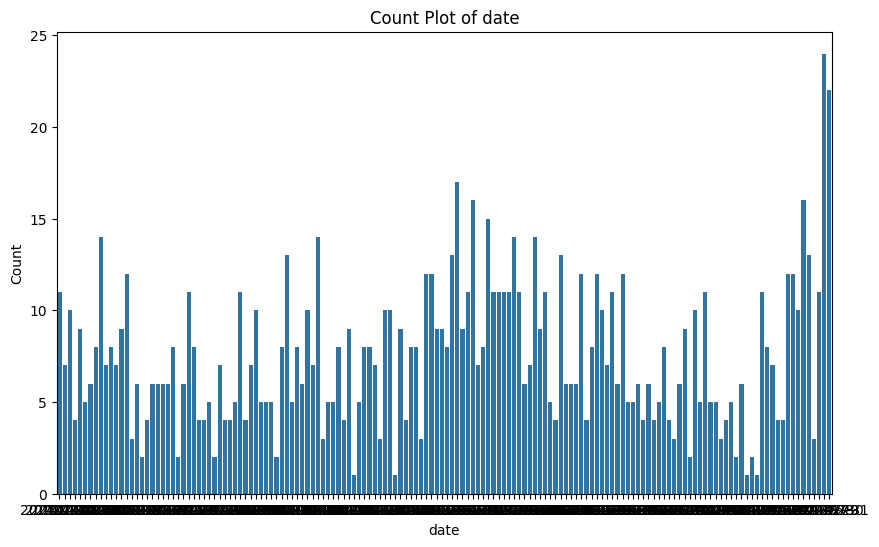

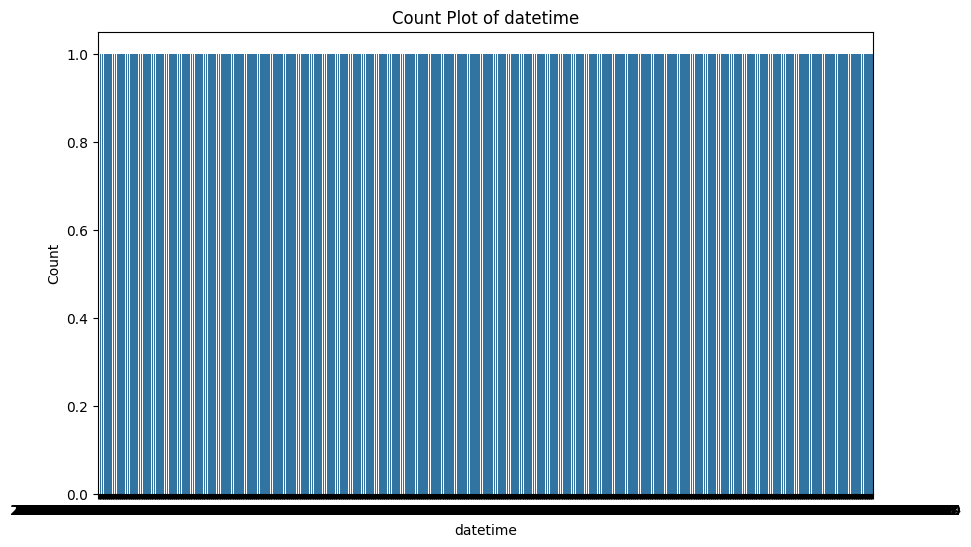

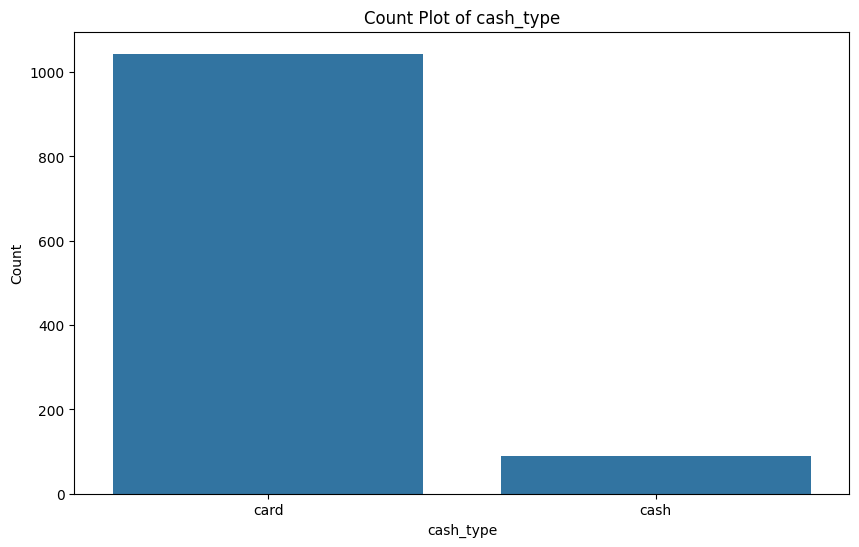

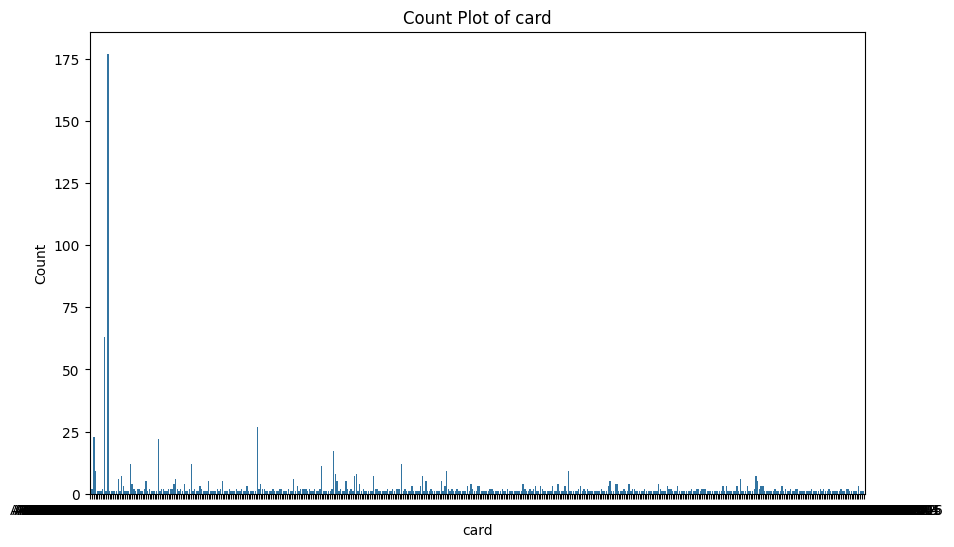

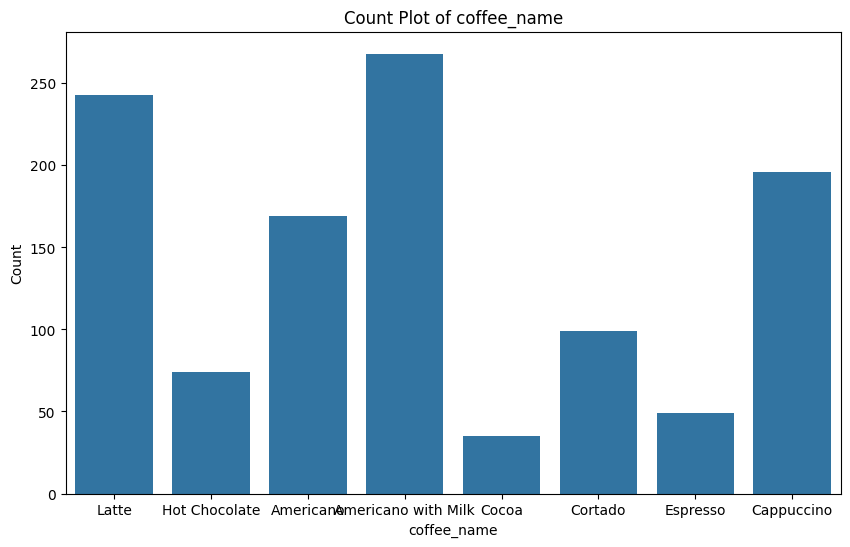

In [ ]:
# Count plots of categorical columns
for column in df.select_dtypes(exclude=['number']).columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed10
    sns.countplot(x=df[column])  # kde adds a kernel density estimate curve
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

<Axes: >

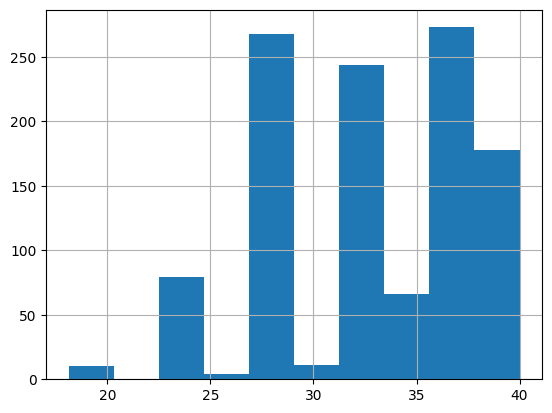

In [ ]:
# Histogram plot of numerical columns
df['money'].hist()

In [ ]:
#Proportion of Unique Values in coffee_name column:
pd.DataFrame(df['coffee_name'].value_counts(normalize=
 True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [ ]:
#converting date and datetime  to datetime type
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])


In [ ]:
print(df.dtypes)

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object


In [ ]:
# Feature Creation
# create column of month,weekday and hours

df['month']=df['date'].dt.strftime('%y-%m')
df['day']=df['date'].dt.strftime('%w')
df['hour']=df['datetime'].dt.strftime('%H')

In [ ]:
# Outliers Detection using IQR (Interquartile Range)
print("\nOutliers Detection (Using IQR) for Numerical Columns:")
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}' column: {len(outliers)} rows")


Outliers Detection (Using IQR) for Numerical Columns:
Outliers in 'money' column: 0 rows


**3.Analyze Sales Trends:**

**a. Time-Based Trends**

In [ ]:
#monthly_sales data:
monthly_sales = df.groupby(['coffee_name', 'month']).count()['date'].reset_index().rename(columns={'date': 'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales


coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,24-03,36,34,20,6,30,10,22,48
1,24-04,35,42,43,6,19,7,13,31
2,24-05,48,58,55,9,17,8,14,58
3,24-06,14,69,46,5,19,10,14,50
4,24-07,36,65,32,9,14,14,11,56


<Axes: xlabel='month'>

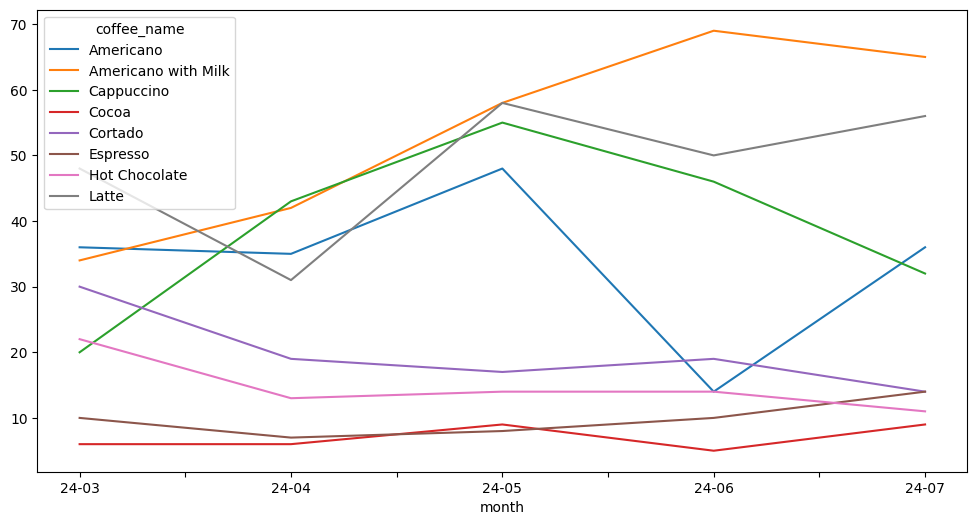

In [ ]:
#Line plot of the monthly sales:
monthly_sales.plot(x='month', figsize=(12, 6))


In [ ]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


In [ ]:
#Weekday sales
weekday_sales =df.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x7da2793b2910>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

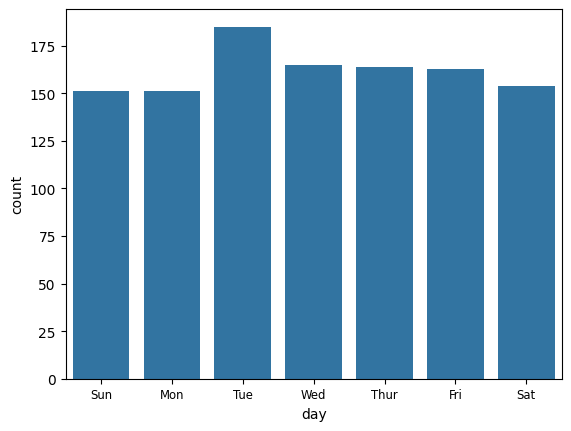

In [ ]:
# Bar plot distribution of Weekday sales
sns.barplot(x='day',y='count',data=weekday_sales)
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')


In [ ]:
#Daily sales:
daily_sales = df.groupby(['coffee_name','date']).count()['datetime'] .reset_index().reset_index().rename(columns={'datetime': 'count'}) .pivot(index='date', columns='coffee_name', values='count') .reset_index().fillna(0)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [ ]:

daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


<Figure size 1200x600 with 0 Axes>

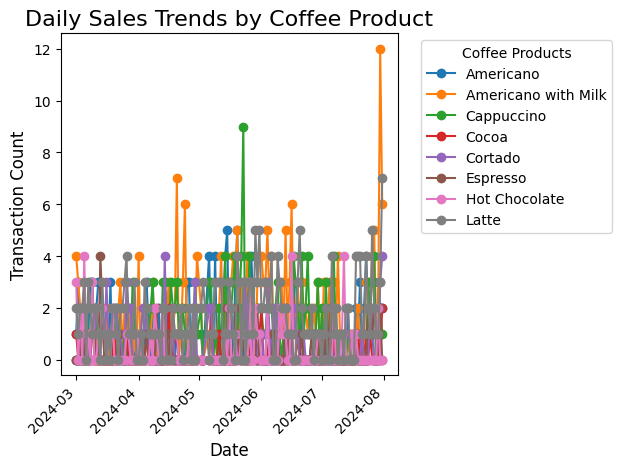

In [ ]:
#Lineplot visualization of Daily sales:


daily_sales.set_index('date', inplace=True)

# Plot the sales trends for each coffee product
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o')

# Adding titles and labels
plt.title('Daily Sales Trends by Coffee Product', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.legend(title='Coffee Products', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
 #Hourly sales:
 hourly_sales= df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
 hourly_sales

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


([<matplotlib.axis.XTick at 0x7da27a829150>,
 [Text(0, 0, '07'),
  Text(1, 0, '08'),
  Text(2, 0, '09'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '16'),
  Text(10, 0, '17'),
  Text(11, 0, '18'),
  Text(12, 0, '19'),
  Text(13, 0, '20'),
  Text(14, 0, '21'),
  Text(15, 0, '22')])

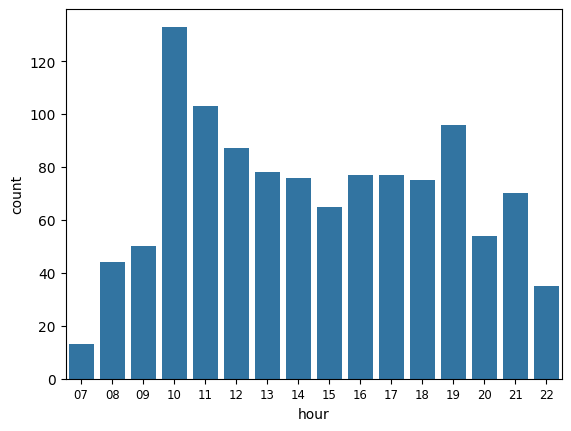

In [ ]:
#Hourly Sales Plot:
sns.barplot(x='hour',y='count',data=hourly_sales)
plt.xticks(range(len(hourly_sales['hour'])),hourly_sales['hour'],size='small')

In [ ]:
hourly_sales_by_coffee=df.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee


coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,07,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,08,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,09,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


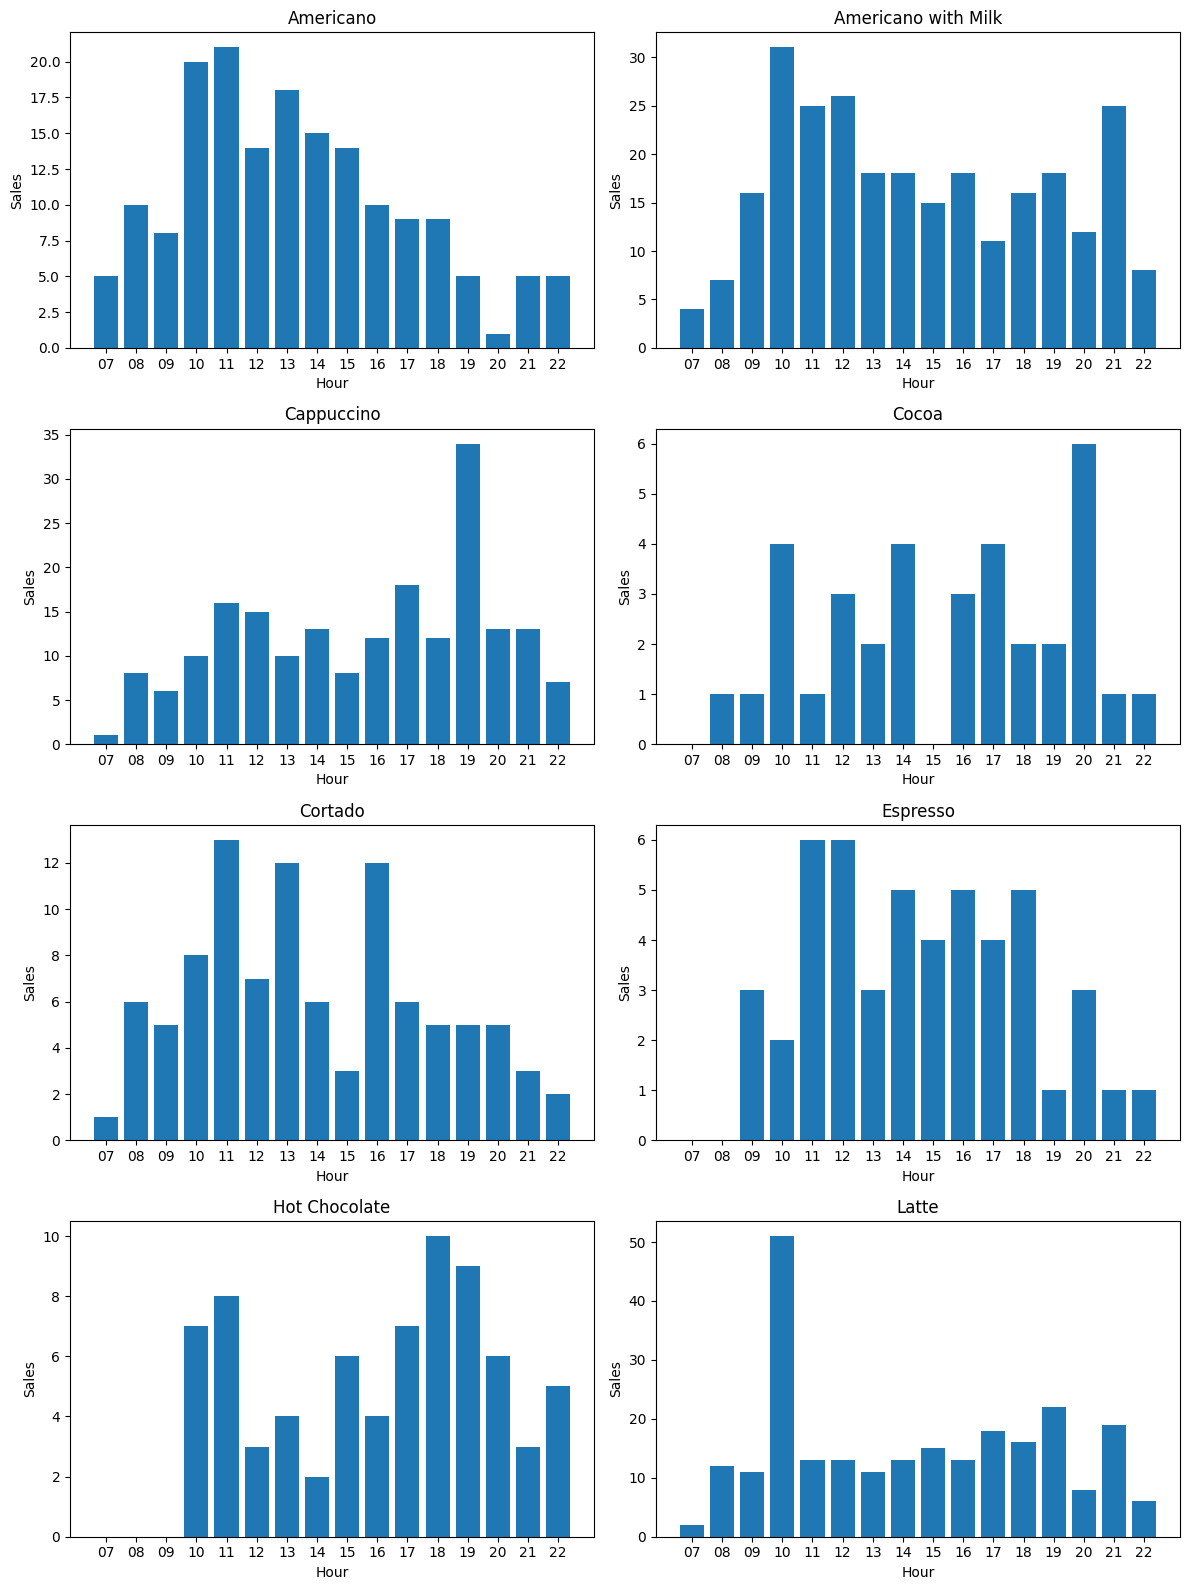

In [ ]:
#Hourly_Sales_by_coffee plot
num_products = len(hourly_sales_by_coffee.columns[1:])  # Number of coffee products
rows = (num_products + 1) // 2

# Create subplots with 2 plots per row
fig, axs = plt.subplots(rows, 2, figsize=(12, rows * 4))
axs = axs.flatten()  # Flatten the 2D array for easier indexing

# Loop through each coffee product and plot
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
    axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')  # Title for each subplot
    axs[i].set_xlabel('Hour')  # X-axis label
    axs[i].set_ylabel('Sales')  # Y-axis label

# Hide unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()





**b. Product-Based Trends:**

In [ ]:
#revenue contribution of  each the product
revenue_data = df.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money', ascending=False)
revenue_data


,coffee_name,money
7,Latte,9009.14
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
0,Americano,4644.54
6,Hot Chocolate,2778.48
4,Cortado,2745.08
3,Cocoa,1295.94
5,Espresso,1100.62


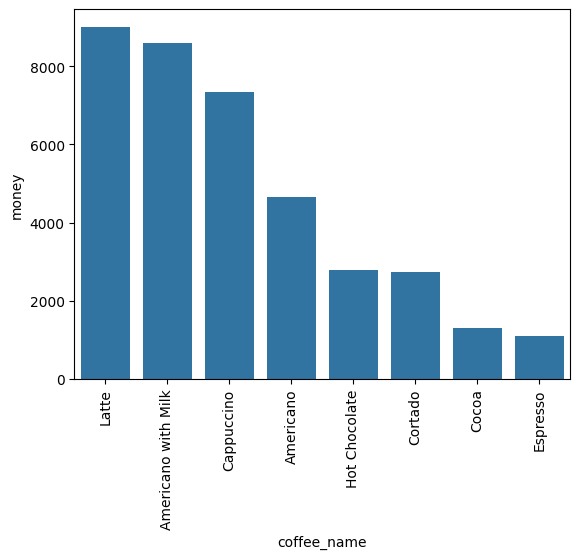

In [ ]:
#Bar plot of the revenue contribution of each coffee product:
sns.barplot(x='coffee_name', y='money', data=revenue_data)
plt.xticks(rotation=90)
plt.show()

Coffee Product Popularity:
coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


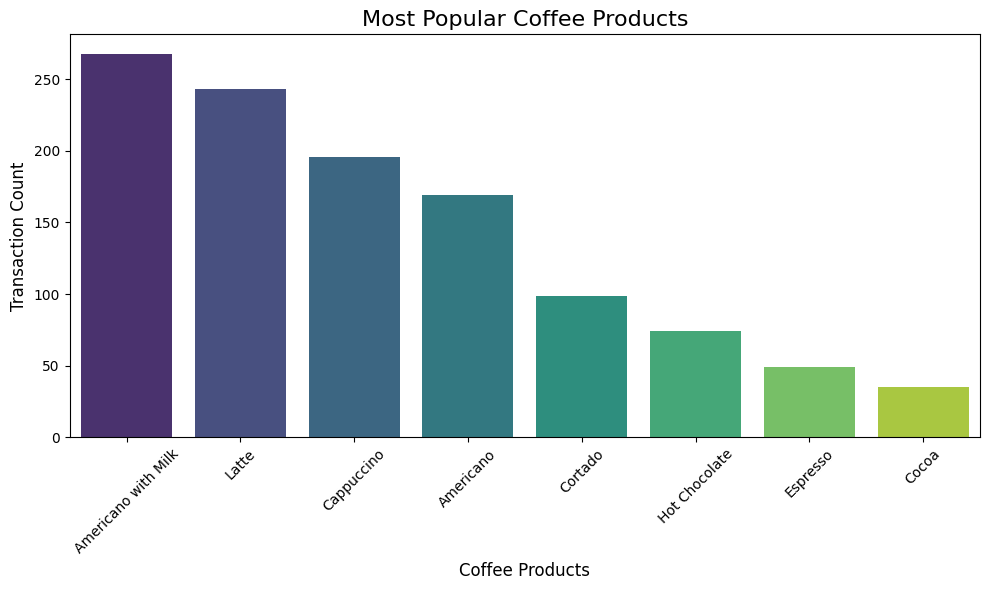

In [ ]:
# Finding most popular cofee products


# Count the number of transactions for each coffee product
product_popularity = df['coffee_name'].value_counts()

# Display the popularity
print("Coffee Product Popularity:")
print(product_popularity)

# Bar plot to visualize the popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=product_popularity.index, y=product_popularity.values, palette='viridis')
plt.title('Most Popular Coffee Products', fontsize=16)
plt.xlabel('Coffee Products', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4. Identifying Customer Preferences**

Payment Method Proportions (in %):
cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64


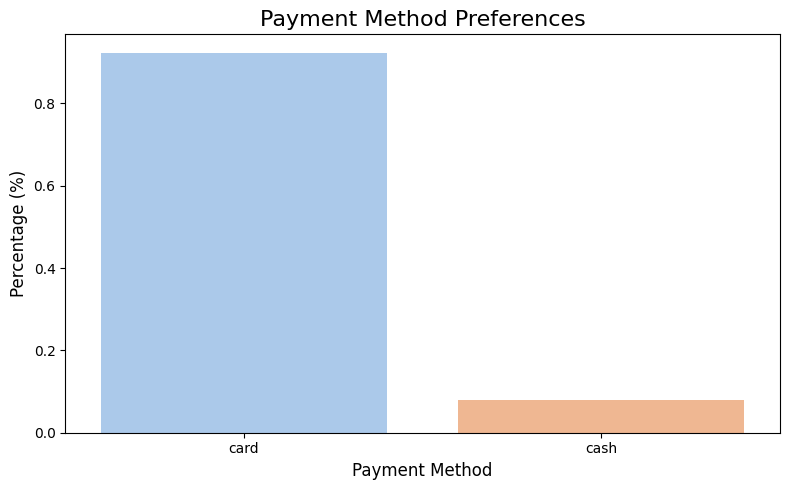

In [ ]:
#Proportion of Unique Values in cash_type column:
payment_method_proportion=df['cash_type'].value_counts(normalize=True)

# Display the proportions
print("Payment Method Proportions (in %):")
print(payment_method_proportion)

# Bar plot to visualize the proportion
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_method_proportion.index, y=payment_method_proportion.values, palette='pastel')
plt.title('Payment Method Preferences', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From the above graph,we can see 92% of the customers use card for payement method

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
day                                                                       
0                   17                   34          28      3       14   
1                   37                   32          31      3       11   
2                   26                   54          27      9       18   
3                   23                   35          29      6       18   
4                   24                   31          27      1       14   
5                   25                   34          23      7       16   
6                   17                   48          31      6        8   

coffee_name  Espresso  Hot Chocolate  Latte  
day                                          
0                   8             14     33  
1                   4              5     28  
2                   3             15     33  
3                  13              8     33  
4                   9             12     46  
5 

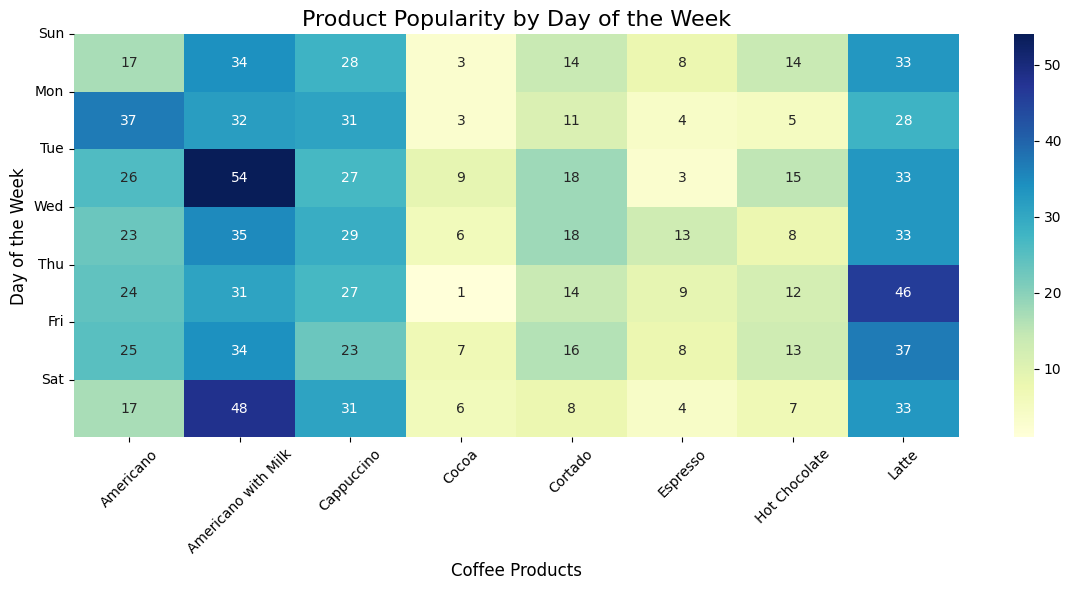

In [ ]:
#Product popularity based on the specific day of the week


# Count transactions for each product by day of the week
product_popularity_by_day = df.groupby(['coffee_name', 'day']).size().reset_index(name='count')

# Pivot the data for better visualization
pivot_day = product_popularity_by_day.pivot(index='day', columns='coffee_name', values='count').fillna(0)

# Display the pivot table
print(pivot_day)

# Heatmap for visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_day, cmap='YlGnBu', annot=True, fmt=".0f", cbar=True)
plt.title('Product Popularity by Day of the Week', fontsize=16)
plt.xlabel('Coffee Products', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=0)
plt.tight_layout()
plt.show()


coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
hour                                                                      
07                 5.0                  4.0         1.0    0.0      1.0   
08                10.0                  7.0         8.0    1.0      6.0   
09                 8.0                 16.0         6.0    1.0      5.0   
10                20.0                 31.0        10.0    4.0      8.0   
11                21.0                 25.0        16.0    1.0     13.0   
12                14.0                 26.0        15.0    3.0      7.0   
13                18.0                 18.0        10.0    2.0     12.0   
14                15.0                 18.0        13.0    4.0      6.0   
15                14.0                 15.0         8.0    0.0      3.0   
16                10.0                 18.0        12.0    3.0     12.0   
17                 9.0                 11.0        18.0    4.0      6.0   
18                 9.0   

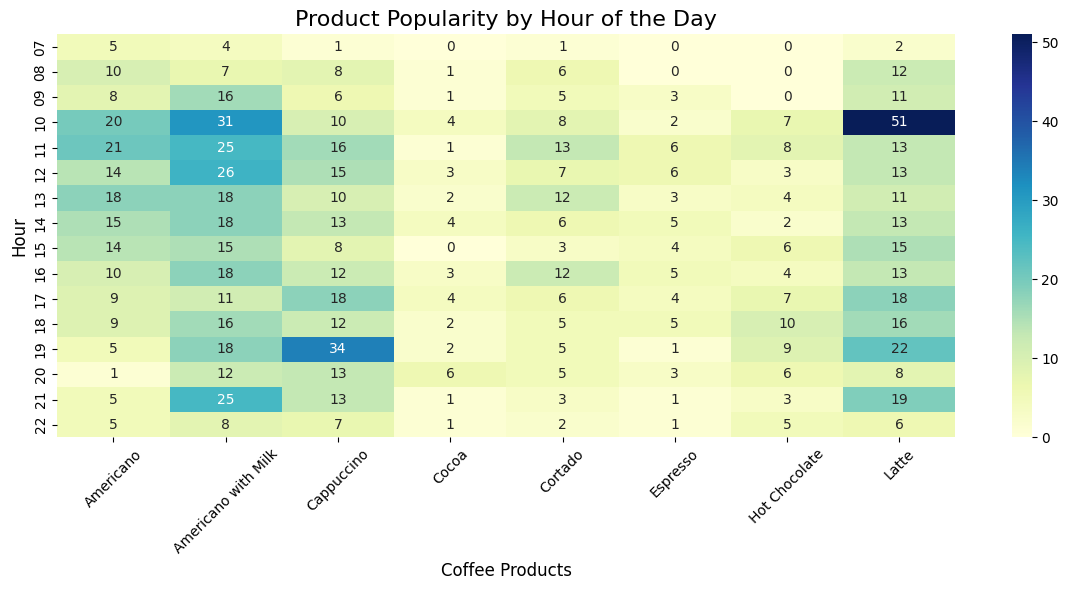

In [ ]:
# Product Popularity based on the specific hour of the day


# Count transactions for each product by hour
product_popularity_by_hour = df.groupby(['coffee_name', 'hour']).size().reset_index(name='count')

# Pivot the data for better visualization
pivot_hour = product_popularity_by_hour.pivot(index='hour', columns='coffee_name', values='count').fillna(0)

# Display the pivot table
print(pivot_hour)

# Heatmap for visualization
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_hour, cmap='YlGnBu', annot=True, fmt=".0f", cbar=True)
plt.title('Product Popularity by Hour of the Day', fontsize=16)
plt.xlabel('Coffee Products', fontsize=12)
plt.ylabel('Hour', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Feature Creation**

In [ ]:
#Day of the week
df['day_of_week'] = df['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday


In [ ]:
#Weekend Indicator:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
#Time of the day
df['hour'] = df['hour'].astype(int)

df['time_of_day'] = df['hour'].apply(lambda x: 'Morning' if 5 <= x < 12 else ('Afternoon' if 12 <= x < 17 else 'Evening'))


In [ ]:
#Month and Quarter:
df['month'] = df['datetime'].dt.month
df['quarter'] = df['datetime'].dt.quarter

In [ ]:
#Repeat costumer
df['is_repeat_customer'] = df.groupby('card')['card'].transform('count').apply(lambda x: 1 if x > 1 else 0)


In [ ]:
#Sales of the Previous day
df['previous_day_sales'] = df['money'].shift(1)


In [ ]:
#sales trends between the current day's sales and the sales from 5 days ago.
df['sales_trend'] = df['money'].diff(periods=5)


In [ ]:
#Interaction Between Coffee Type and Hour
df['coffee_hour_interaction'] = df['coffee_name'] + "_" + df['hour'].astype(str)


In [ ]:
#Interaction Between Day and Hour
df['day_hour_interaction'] = df['day'].astype(str) + "_" + df['hour'].astype(str)


In [ ]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,day_of_week,is_weekend,time_of_day,quarter,is_repeat_customer,previous_day_sales,sales_trend,coffee_hour_interaction,day_hour_interaction
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,5,10,4,0,Morning,1,1,NaN,NaN,Latte_10,5_10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,5,12,4,0,Afternoon,1,1,38.7,NaN,Hot Chocolate_12,5_12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,5,12,4,0,Afternoon,1,1,38.7,NaN,Hot Chocolate_12,5_12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,5,13,4,0,Afternoon,1,1,38.7,NaN,Americano_13,5_13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,5,13,4,0,Afternoon,1,1,28.9,NaN,Latte_13,5_13


In [ ]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0
month,0
day,0
hour,0
day_of_week,0


In [ ]:
#drop null values
df.dropna(inplace=True)

**ML model**

In [ ]:
target=df[['money']]

In [ ]:
features=df.drop(columns=['money','datetime','date'])

In [ ]:
target

,money
5,33.80
6,38.70
7,33.80
8,38.70
9,33.80
...,...
1128,23.02
1129,27.92
1130,32.82
1131,32.82


In [ ]:
features['day'] = pd.to_numeric(features['day'], errors='coerce')  # Converts non-numeric to NaN
features['day'] = features['day'].fillna(features['day'].mode()[0]).astype(int)  # Fill NaN with mode and convert to int


In [ ]:
features.dtypes

,0
cash_type,object
card,object
coffee_name,object
month,int32
day,int64
hour,int64
day_of_week,int32
is_weekend,int64
time_of_day,object
quarter,int32


In [ ]:
#Scaling Numerical Columns:
scaler=StandardScaler()
# List of numerical columns to scale
num_cols = ['month', 'day', 'hour', 'day_of_week', 'is_weekend', 'quarter',
            'is_repeat_customer', 'previous_day_sales', 'sales_trend']


features[num_cols] = scaler.fit_transform(features[num_cols])

In [ ]:
#Encoding Categorical Columns:
le = LabelEncoder()

# List of categorical columns to encode
cat_cols = ['cash_type', 'card', 'coffee_name', 'time_of_day', 'coffee_hour_interaction','day_hour_interaction']


for col in cat_cols:
    features[col] = le.fit_transform(features[col])

In [ ]:
features.head()

,cash_type,card,coffee_name,month,day,hour,day_of_week,is_weekend,time_of_day,quarter,is_repeat_customer,previous_day_sales,sales_trend,coffee_hour_interaction,day_hour_interaction
5,0,3,1,-1.509332,1.019895,0.106705,0.537737,-0.608765,0,-1.65818,-1.736155,1.113346,-0.746911,5,85
6,0,4,6,-1.509332,1.019895,0.351346,0.537737,-0.608765,0,-1.65818,-1.736155,0.140053,0.004664,98,86
7,0,5,1,-1.509332,1.019895,0.840627,0.537737,-0.608765,1,-1.65818,-1.736155,1.113346,-0.746911,8,88
8,0,6,3,-1.509332,1.019895,1.085268,0.537737,-0.608765,1,-1.65818,0.575985,0.140053,1.507815,56,89
9,0,6,1,-1.509332,1.019895,1.085268,0.537737,-0.608765,1,-1.65818,0.575985,1.113346,-0.746911,9,89


In [ ]:
pip install statsmodels


In [ ]:
#VIF(Variance Inflation Factor)check:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display VIF values
print(vif_data)

                    Feature        VIF
0                 cash_type   1.237480
1                      card   5.547444
2               coffee_name  39.972382
3                     month   6.365155
4                       day   4.161789
5                      hour   1.338997
6               day_of_week   3.284700
7                is_weekend   3.071634
8               time_of_day   3.287400
9                   quarter   5.330243
10       is_repeat_customer   1.230525
11       previous_day_sales   1.149673
12              sales_trend   1.155120
13  coffee_hour_interaction  43.443551
14     day_hour_interaction  10.461576


In [ ]:
features.drop(columns=['coffee_hour_interaction'],inplace=True)

In [ ]:
features.drop(columns=['month','quarter'],inplace=True)

In [ ]:
# RECHECK VIF(Variance Inflation Factor):
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display VIF values
print(vif_data)

                 Feature       VIF
0              cash_type  1.231958
1                   card  3.042317
2            coffee_name  2.706267
3                    day  3.464002
4                   hour  1.268585
5            day_of_week  3.282224
6             is_weekend  3.054822
7            time_of_day  3.164582
8     is_repeat_customer  1.170755
9     previous_day_sales  1.073150
10           sales_trend  1.122983
11  day_hour_interaction  7.789830


In [ ]:
#Linear regression model

lin_model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)
lin_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=lin_model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_predict)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 11.606891813232853
Root Mean Squared Error (RMSE): 3.406888875973628
R² Score: 0.5409945645739302


**Forecasting Model for  Next day/week/month sales**

**1.Next day sales**

In [ ]:
#Create a dataframe for next day sales:

df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime

# Aggregate daily sales
daily_sales_df = df.groupby('date')['money'].sum().reset_index()
daily_sales_df.rename(columns={'money': 'daily_sales'}, inplace=True)


date_range = pd.date_range(start=daily_sales_df['date'].min(), end=daily_sales_df['date'].max())
daily_sales_df = daily_sales_df.set_index('date').reindex(date_range, fill_value=0).reset_index()

# Rename index column
daily_sales_df.rename(columns={'index': 'date'}, inplace=True)

# Display final dataset
daily_sales_df


,date,daily_sales
0,2024-03-01,212.60
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
148,2024-07-27,372.76
149,2024-07-28,78.86
150,2024-07-29,321.82
151,2024-07-30,650.48


In [ ]:
#Holt-Winters Method:
model = ExponentialSmoothing(daily_sales_df['daily_sales'],
                              trend='additive',
                              seasonal='additive',
                              seasonal_periods=7)  # Set to 7 for weekly seasonality


# Fit the model to the data
fit_model = model.fit(smoothing_level=0.2, smoothing_trend=0.3, smoothing_seasonal=0.4)

In [ ]:
fitted_values = fit_model.fittedvalues
fitted_values_df = pd.DataFrame(fitted_values, columns=['fitted_values'], index=daily_sales_df.index)
fitted_values_df

,fitted_values
0,208.448997
1,291.969204
2,248.936486
3,218.163322
4,301.731858
...,...
148,340.615851
149,387.491104
150,266.865473
151,400.080073


In [ ]:
#Forecasting the next 10 days sales value:
forecast=fit_model.forecast(10)
forecast


,0
153,545.794537
154,660.160700
155,605.882742
156,520.451101
157,635.935846
158,861.990332
159,778.995008
160,832.664689
161,947.030852
162,892.752894


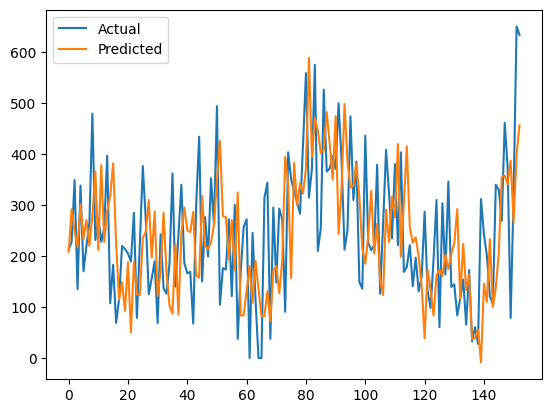

In [ ]:
df_merged = daily_sales_df.merge(fitted_values_df, left_index=True, right_index=True, how='left')
plt.plot(df_merged['daily_sales'],label='Actual')
plt.plot(df_merged[	'fitted_values'],label='Predicted')
plt.legend(loc='best')

**Next Week Sales**

In [ ]:

#Create a dataframe for next week sales:

df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if 'date' column is correctly formatted
if df['date'].isnull().any():
    print("There are invalid date values in the 'date' column.")
else:
    # Set 'date' column as index for resampling
    df.set_index('date', inplace=True)

    # Resample the data to weekly sales, summing the 'money' column
    weekly_sales_df = df.resample('W')['money'].sum().reset_index()

    weekly_sales_df.rename(columns={'money': 'weekly_sales'}, inplace=True)

    # Add a 'week' column to represent the week number (1, 2, 3, ...)
    weekly_sales_df['week'] = range(1, len(weekly_sales_df) + 1)

    # Display the result
    print(weekly_sales_df)

         date  weekly_sales  week
0  2024-03-03        789.80     1
1  2024-03-10       1840.50     2
2  2024-03-17       1516.30     3
3  2024-03-24       1307.80     4
4  2024-03-31       1412.10     5
5  2024-04-07       1434.50     6
6  2024-04-14       1666.00     7
7  2024-04-21       1838.84     8
8  2024-04-28       1251.20     9
9  2024-05-05        890.18    10
10 2024-05-12       1705.80    11
11 2024-05-19       2180.26    12
12 2024-05-26       2811.80    13
13 2024-06-02       2605.00    14
14 2024-06-09       2143.52    15
15 2024-06-16       1835.98    16
16 2024-06-23       1911.42    17
17 2024-06-30       1268.24    18
18 2024-07-07       1475.42    19
19 2024-07-14        876.80    20
20 2024-07-21        998.28    21
21 2024-07-28       1959.30    22
22 2024-08-04       1606.14    23


In [ ]:
# Fit the model using Triple Exponential Smoothing (Holt-Winters)
model = ExponentialSmoothing(weekly_sales_df['weekly_sales'], trend='add', seasonal='add', seasonal_periods=4)
model_fit = model.fit()

         date  weekly_sales  week  fitted_values
0  2024-03-03        789.80     1    1298.540383
1  2024-03-10       1840.50     2    1013.753814
2  2024-03-17       1516.30     3    1603.205707
3  2024-03-24       1307.80     4    1545.350771
4  2024-03-31       1412.10     5    1400.869121
5  2024-04-07       1434.50     6    1497.845614
6  2024-04-14       1666.00     7    1500.123765
7  2024-04-21       1838.84     8    1587.694198
8  2024-04-28       1251.20     9    1758.065637
9  2024-05-05        890.18    10    1533.466721
10 2024-05-12       1705.80    11    1178.245210
11 2024-05-19       2180.26    12    1482.730836
12 2024-05-26       2811.80    13    1894.990661
13 2024-06-02       2605.00    14    2560.052074
14 2024-06-09       2143.52    15    2713.576904
15 2024-06-16       1835.98    16    2376.847485
16 2024-06-23       1911.42    17    2041.001936
17 2024-06-30       1268.24    18    2010.083968
18 2024-07-07       1475.42    19    1621.705786
19 2024-07-14       

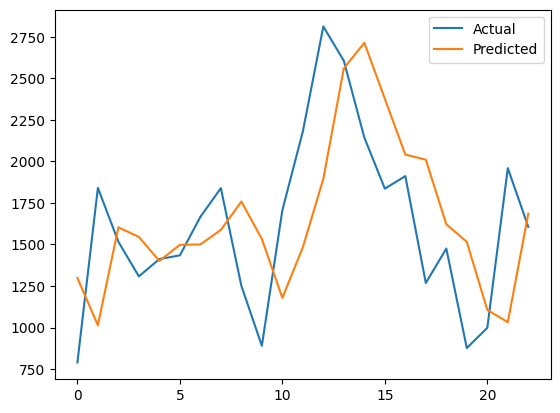

In [ ]:
fitted_values = model_fit.fittedvalues
fitted_values_df = pd.DataFrame(fitted_values, columns=['fitted_values'], index=weekly_sales_df.index)
fitted_values_df['week'] = weekly_sales_df['week']
df_merged1= pd.merge(weekly_sales_df, fitted_values_df, on='week', how='left')

# Display the merged dataframe
print(df_merged1)


plt.plot(df_merged1['weekly_sales'],label='Actual')
plt.plot(df_merged1[	'fitted_values'],label='Predicted')
plt.legend(loc='best')


In [ ]:
#Forescasting weekely sales for next 10 weeks
model_fit.forecast(10)

,0
23,1601.396193
24,1616.956774
25,1667.767862
26,1716.717108
27,1680.781444
28,1696.342025
29,1747.153114
30,1796.102360
31,1760.166696
32,1775.727277


**Next Month Sales**

In [ ]:
# Create a dataframe for next month sales:
df['datetime'] = pd.to_datetime(df['datetime'])

# Aggregate total sales per month
monthly_sales_df = df.resample('M', on='datetime')['money'].sum().reset_index()
monthly_sales_df.rename(columns={'money': 'monthly_sales'}, inplace=True)
print(monthly_sales_df)


    datetime  monthly_sales
0 2024-03-31        6866.50
1 2024-04-30        6720.56
2 2024-05-31        9063.42
3 2024-06-30        7758.76
4 2024-07-31        6915.94


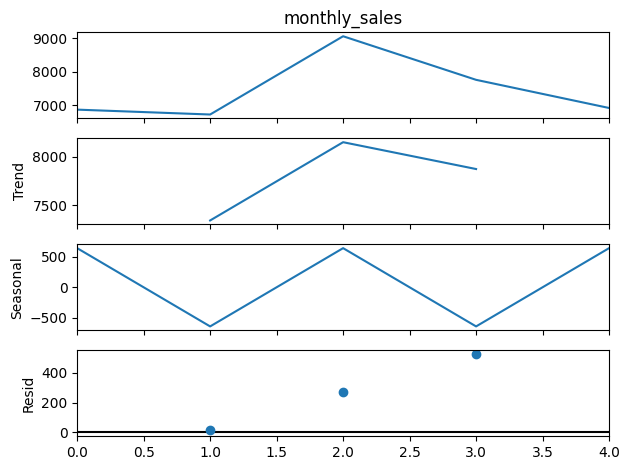

In [ ]:

# Decompose time series
decomposition = seasonal_decompose(monthly_sales_df['monthly_sales'], period=2, model='additive')

# Plot results
decomposition.plot()
plt.show()


In [ ]:
# Fit Holt-Winters model
hw_model = ExponentialSmoothing(
    monthly_sales_df['monthly_sales'],
    trend='additive',
   seasonal='additive',
   seasonal_periods=2
).fit()


In [ ]:
# Predict for the next month
forecast = hw_model.forecast(steps=1)

# Print forecasted sales for August 2024
print(forecast)


5    7188.841511
dtype: float64
